In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# Dataset from NOAA 
df = pd.read_csv("/home/julien/Documents/1603171.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y',errors='coerce')

df.head(10)

,date,prcp,tavg,tmax,tmin
0,1945-03-01,2.1,NaN,6.8,-0.9
1,1945-03-02,1.0,NaN,6.0,-1.0
2,1945-03-03,3.8,NaN,5.8,0.2
3,1945-03-04,4.4,NaN,6.8,0.0
4,1945-03-05,7.2,NaN,5.8,1.3
5,1945-03-06,7.2,NaN,6.7,5.0
6,1945-03-07,3.8,NaN,6.8,5.2
7,1945-03-08,0.4,NaN,8.3,1.3
8,1945-03-09,0.0,NaN,8.8,3.5
9,1945-03-10,0.0,NaN,9.2,4.7


In [26]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
#df.sort_values(by=['day', 'month', 'year'], inplace=True)
df.sort_index(inplace=True)


df.head(60)

,date,prcp,tavg,tmax,tmin,year,month,day
0,1945-03-01,2.1,NaN,6.8,-0.9,1945,3,1
1,1945-03-02,1.0,NaN,6.0,-1.0,1945,3,2
2,1945-03-03,3.8,NaN,5.8,0.2,1945,3,3
3,1945-03-04,4.4,NaN,6.8,0.0,1945,3,4
4,1945-03-05,7.2,NaN,5.8,1.3,1945,3,5
5,1945-03-06,7.2,NaN,6.7,5.0,1945,3,6
6,1945-03-07,3.8,NaN,6.8,5.2,1945,3,7
7,1945-03-08,0.4,NaN,8.3,1.3,1945,3,8
8,1945-03-09,0.0,NaN,8.8,3.5,1945,3,9
9,1945-03-10,0.0,NaN,9.2,4.7,1945,3,10


In [4]:
dayofyear_df = df.groupby(df['date'].dt.dayofyear).mean()

In [5]:
dayofyear_df.plot(rot=0, subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c28019d30>,
      dtype=object)

In [6]:
dayofyear_df.head(500)

,prcp,tavg,tmax,tmin
date,,,,
1,3.255385,2.937209,4.635000,0.014516
2,3.335385,3.861905,5.471212,0.147692
3,3.025758,3.435556,4.765672,0.312698
4,2.088571,3.345652,4.818841,0.074627
5,3.117143,3.453191,5.082609,0.241538
6,2.432836,3.602128,5.055072,0.479412
7,1.721212,3.482979,5.033824,0.203077
8,2.437879,3.515217,5.124286,0.288889
9,2.489706,3.853191,5.503175,0.134328


In [43]:
f = lambda x: math.sqrt((x.tmax - dayofyear_df.loc[x.date.dayofyear].tmax)**2)


In [44]:
df["tmax_std_dev"] = df.apply(f, axis=1, result_type='reduce')

In [45]:
df.head(30)

,date,prcp,tavg,tmax,tmin,tmax_std_dev
0,1945-03-01,2.1,NaN,6.8,-0.9,0.747222
1,1945-03-02,1.0,NaN,6.0,-1.0,2.034783
2,1945-03-03,3.8,NaN,5.8,0.2,2.281429
3,1945-03-04,4.4,NaN,6.8,0.0,1.614286
4,1945-03-05,7.2,NaN,5.8,1.3,2.623944
5,1945-03-06,7.2,NaN,6.7,5.0,2.417143
6,1945-03-07,3.8,NaN,6.8,5.2,2.105479
7,1945-03-08,0.4,NaN,8.3,1.3,1.138028
8,1945-03-09,0.0,NaN,8.8,3.5,0.697183
9,1945-03-10,0.0,NaN,9.2,4.7,0.977465


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c271bcc50>,
      dtype=object)

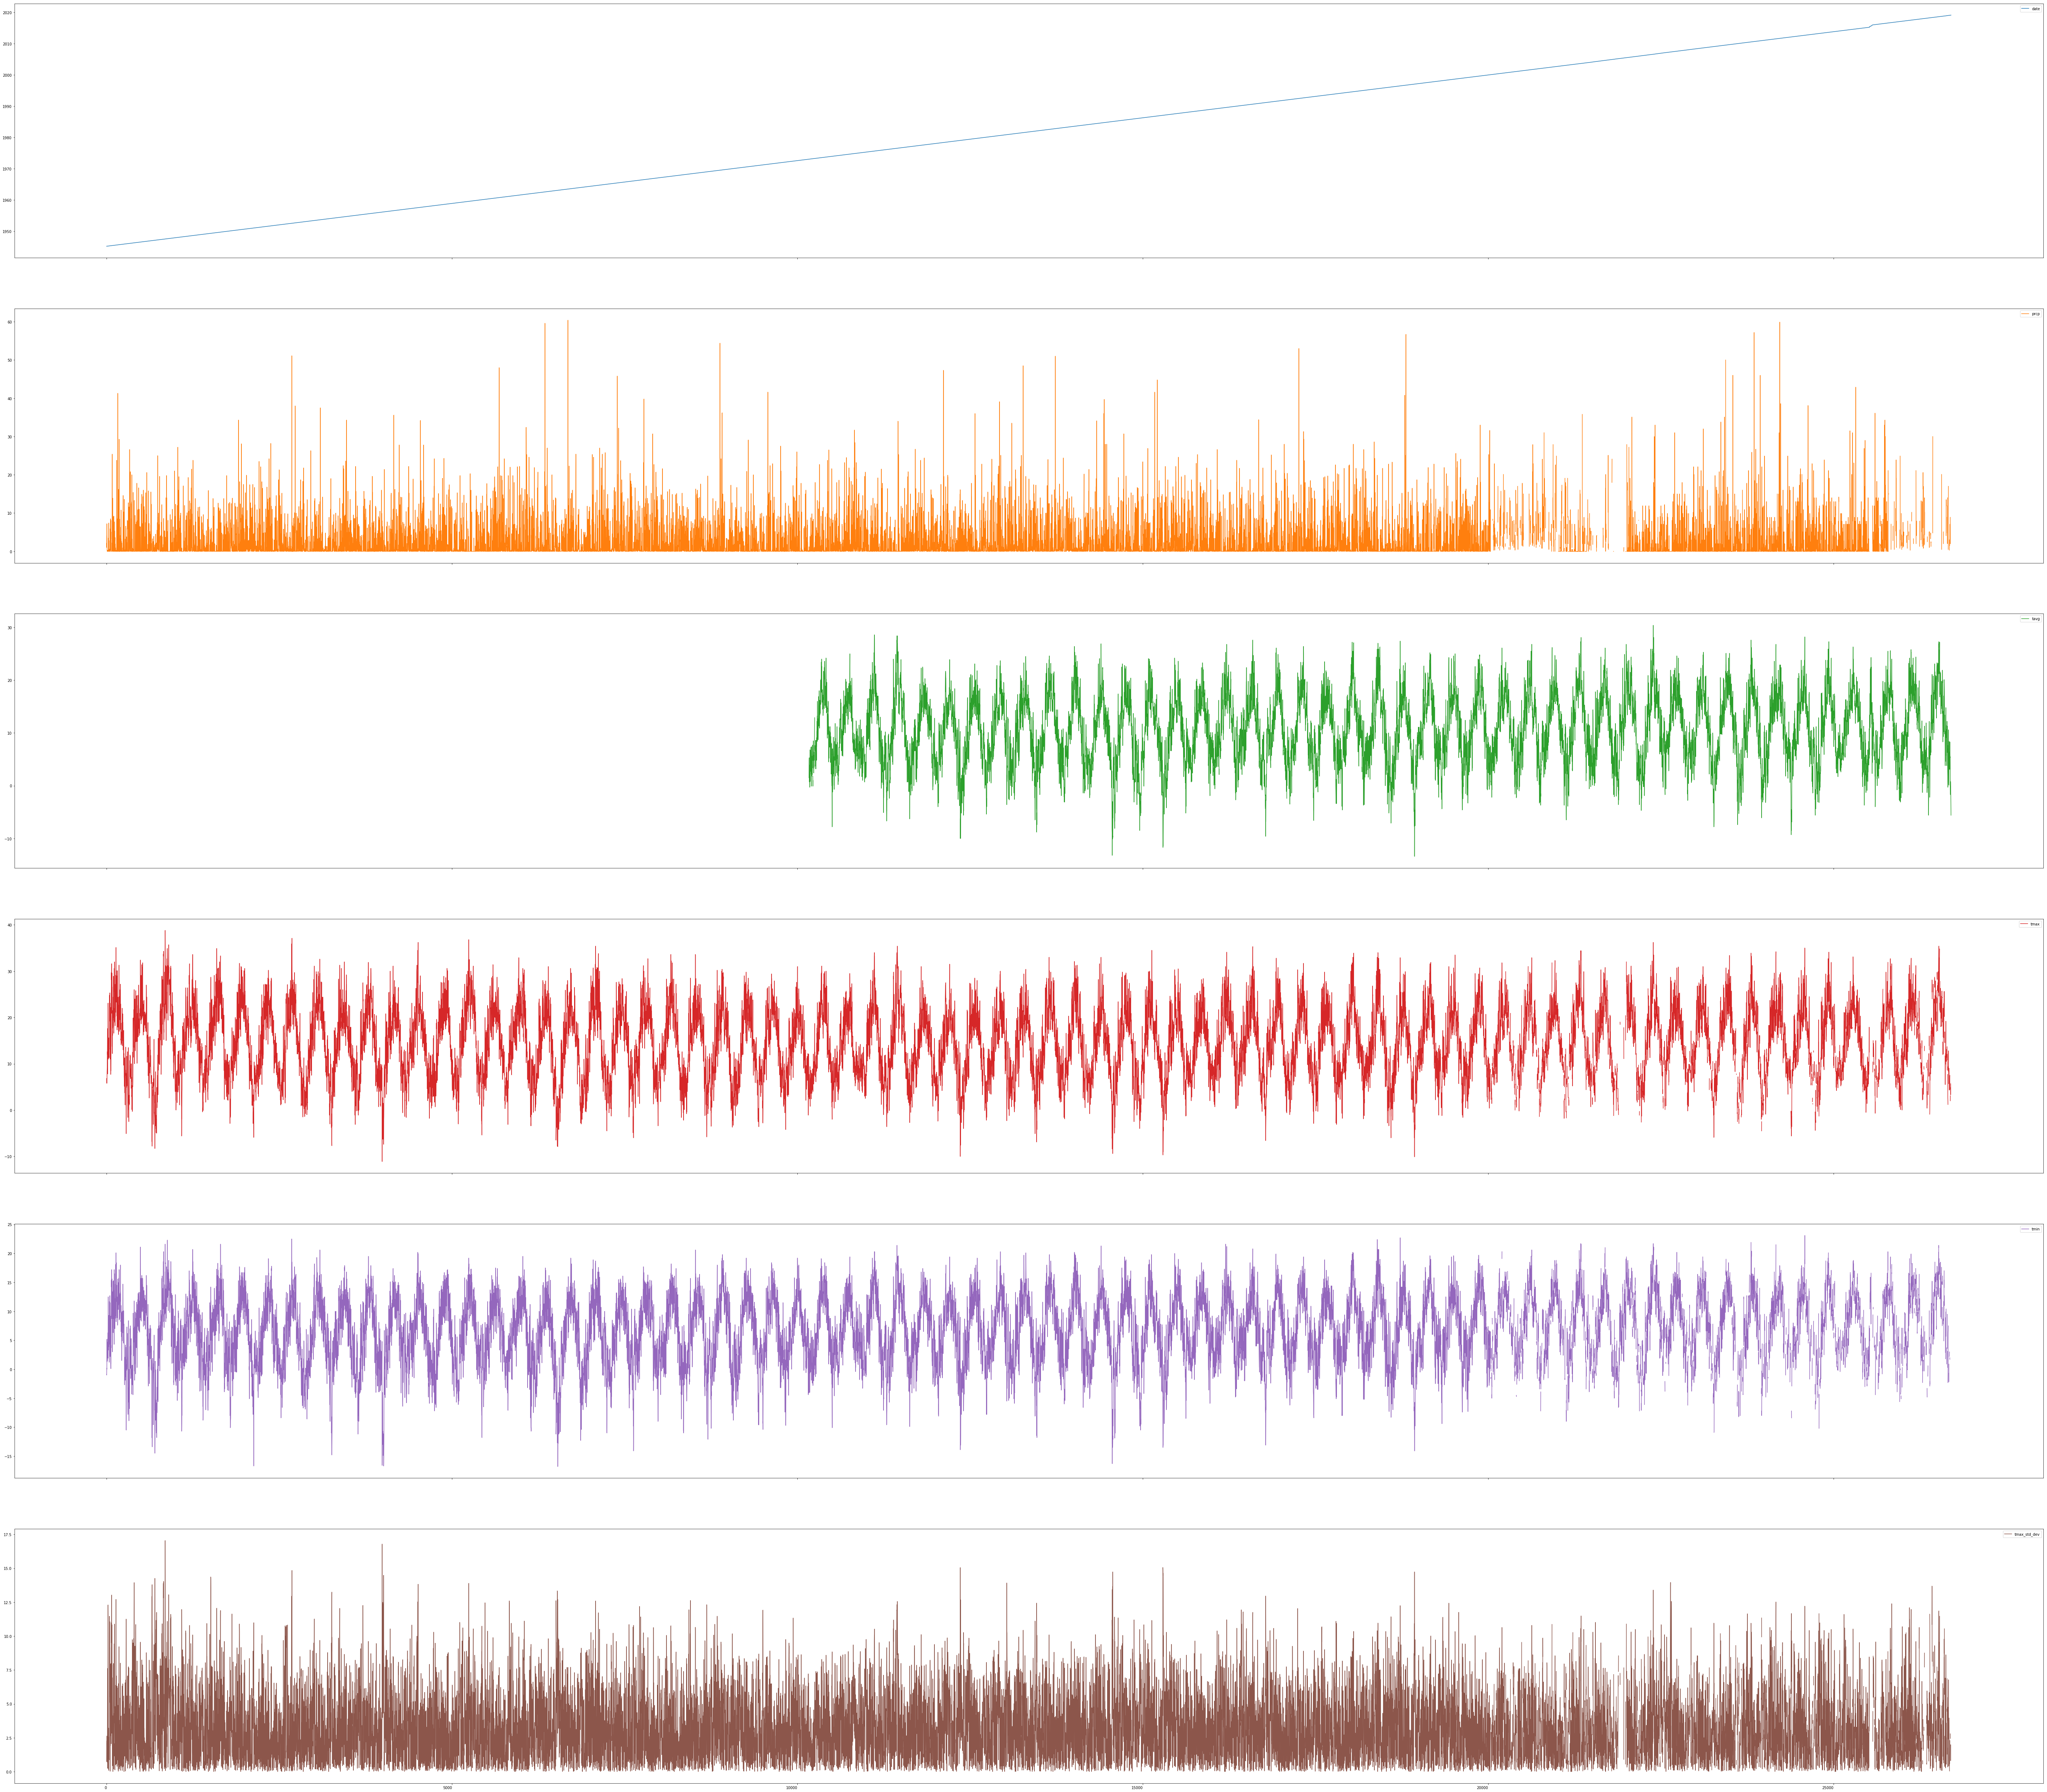

In [50]:
df.plot(rot=0, subplots=True, figsize=(100,100))

In [47]:
df_yearly_tmax_std_dev = df.groupby(df['date'].dt.year).mean()

In [48]:
df_yearly_tmax_std_dev.head(75)

,prcp,tavg,tmax,tmin,tmax_std_dev
date,,,,,
1945,1.996732,NaN,17.323203,7.872876,3.534958
1946,2.314795,NaN,14.211781,5.561096,3.474558
1947,1.750411,NaN,15.604658,6.009041,4.312865
1948,2.166393,NaN,15.362295,6.410109,3.475581
1949,1.430959,NaN,15.798356,6.232329,3.301709
1950,2.605205,NaN,14.534247,5.956712,3.183777
1951,2.406849,NaN,14.925479,6.126575,2.587069
1952,2.519399,NaN,14.492350,5.579235,3.059461
1953,1.522466,NaN,14.912329,6.254247,2.905017


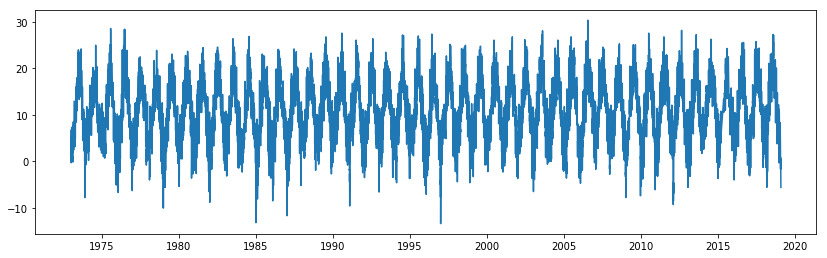

In [42]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(311)
x = df.date
y = df.tavg
ax.xaxis_date()
ax.plot(x,y)

In [36]:
plt.show()

In [62]:
df_1_january = df[(df.month == 1) & (df.day == 1)]

In [63]:
df_1_january.head(40)

,date,prcp,tavg,tmax,tmin,year,month,day
306,1946-01-01,0.0,NaN,-1.0,-4.1,1946,1,1
671,1947-01-01,0.2,NaN,3.8,0.2,1947,1,1
1036,1948-01-01,11.4,NaN,11.3,-0.2,1948,1,1
1402,1949-01-01,0.8,NaN,8.0,-0.1,1949,1,1
1767,1950-01-01,0.0,NaN,4.5,-3.7,1950,1,1
2132,1951-01-01,2.8,NaN,4.5,-6.5,1951,1,1
2497,1952-01-01,8.2,NaN,9.0,1.5,1952,1,1
2863,1953-01-01,1.7,NaN,4.3,-2.7,1953,1,1
3228,1954-01-01,0.0,NaN,1.4,-3.4,1954,1,1
3593,1955-01-01,0.0,NaN,1.4,-2.3,1955,1,1


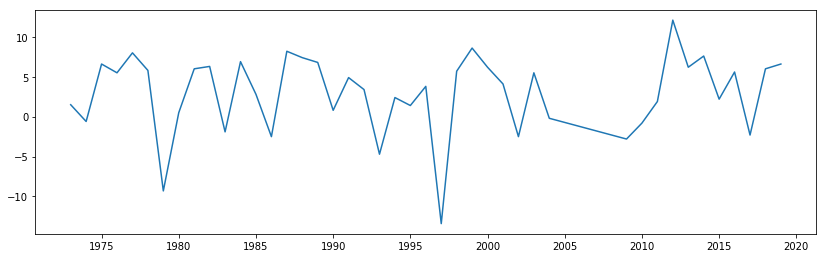

In [64]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(311)
x = df_1_january.date
y = df_1_january.tavg
ax.xaxis_date()
ax.plot(x,y)